# NGC 6453 

* Gaia DR3 filter
* Query results TOP 300k
* R ~ 10 arc min

In [125]:
!pip install astroquery
!pip install gaia
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# suppress warnings. Comment this out if you wish to see the warning messages
import pandas as pd
from math import log
from numpy import sqrt

import warnings
warnings.filterwarnings('ignore')

# Import NGC 6453 data from folder.

In [126]:
df = pd.read_csv ("1662682988110O-result.csv")
print (df)

# 1662682988110O-resultt.csv = ngc 6441 raw data (already in the Clusters-L5 folder)

                 source_id          ra        dec  parallax  parallax_error  \
0      4039960622254335232  267.476148 -37.165792  0.811679        0.492998   
1      4039960622254336128  267.476641 -37.169361       NaN             NaN   
2      4039960622254338432  267.477779 -37.166044       NaN             NaN   
3      4039960622254338688  267.477901 -37.169020 -1.131819        0.824021   
4      4040159874352804096  267.370685 -36.973499  4.603730        0.928780   
...                    ...         ...        ...       ...             ...   
79995  4039957259260925056  267.744440 -37.016189       NaN             NaN   
79996  4039957259260925184  267.744536 -37.016415  1.601428        0.773362   
79997  4039957259260930944  267.743807 -37.016076 -6.513704        0.733209   
79998  4039957259260935168  267.740418 -37.017738       NaN             NaN   
79999  4039957259260935296  267.740472 -37.018155  0.777333        0.295077   

           pmra  pmra_error     pmdec  pmdec_error 

# Import NGC 6441 data from Gaia database.

In [127]:
table_metadata = Gaia.load_table('gaiadr3.gaia_source')
table_metadata

# query for the star cluster Ter 9.

query_1 = '''SELECT TOP 80000 gaia_source.source_id,gaia_source.ra,gaia_source.dec,gaia_source.parallax,gaia_source.parallax_error,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,gaia_source.ruwe,gaia_source.phot_g_mean_flux_over_error,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_flux_over_error,gaia_source.phot_rp_mean_flux_over_error,gaia_source.bp_rp,gaia_source.radial_velocity,gaia_source.phot_variable_flag,gaia_source.non_single_star,gaia_source.has_xp_continuous,gaia_source.has_xp_sampled,gaia_source.has_rvs,gaia_source.has_epoch_photometry,gaia_source.has_epoch_rv,gaia_source.has_mcmc_gspphot,gaia_source.has_mcmc_msc,gaia_source.teff_gspphot,gaia_source.logg_gspphot,gaia_source.mh_gspphot,gaia_source.distance_gspphot,gaia_source.azero_gspphot,gaia_source.ag_gspphot,gaia_source.ebpminrp_gspphot
FROM gaiadr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(267.55441667,-37.05144444,.0830,-2.5510,-5.3480,17.1000,2000,2016.0)),
		COORD2(EPOCH_PROP_POS(267.55441667,-37.05144444,.0830,-2.5510,-5.3480,17.1000,2000,2016.0)),
		0.16666666666666666)
)=1'''

job1 = Gaia.launch_job(query_1)
print(job1)

results = job1.get_results()
results


# Converting astro.table to a df
df = pd.DataFrame(np.array(results))

Retrieving table 'gaiadr3.gaia_source'
<Table length=80000>
            name              dtype       unit                                                 description                                              n_bad
---------------------------- ------- ------------- ---------------------------------------------------------------------------------------------------- -----
                   source_id   int64                                                 Unique source identifier (unique within a particular Data Release)     0
                          ra float64           deg                                                                                      Right ascension     0
                         dec float64           deg                                                                                          Declination     0
                    parallax float64           mas                                                                                             Paralla

In [128]:
df.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ruwe,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,4039960622254335232,267.476148,-37.165792,0.811679,0.492998,-7.253579,0.704271,-6.845114,0.460691,1.021853,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4039960622254336128,267.476641,-37.169361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4039960622254338432,267.477779,-37.166044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4039960622254338688,267.477901,-37.169020,-1.131819,0.824021,-9.570686,0.905819,-8.026539,0.601155,0.977883,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4040159874352804096,267.370685,-36.973499,4.603730,0.928780,-6.004689,1.177505,-5.322137,0.917189,1.080578,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Manipulation

In [129]:
df.columns

Index(['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ruwe',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag',
       'phot_bp_mean_flux_over_error', 'phot_rp_mean_flux_over_error', 'bp_rp',
       'radial_velocity', 'phot_variable_flag', 'non_single_star',
       'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot'],
      dtype='object')

In [130]:
df['mh_gspphot'].describe()

count    9094.000000
mean       -1.127806
std         1.121845
min        -4.128800
25%        -1.671275
50%        -1.160100
75%        -0.187300
max         0.799500
Name: mh_gspphot, dtype: float64

In [131]:
df2 = df[['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ruwe',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag',
       'phot_bp_mean_flux_over_error', 'phot_rp_mean_flux_over_error', 'bp_rp',
       'radial_velocity', 'phot_variable_flag', 'non_single_star',
       'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot']]

In [132]:
df2 = df2.rename(columns = {'ra': 'RA', 'dec': 'DEC', 'parallax': 'Plx', 'parallax_error': 'e_Plx', 'pmra': 'pmRA', 'pmdec': 'pmDEC', 'pmra_error': 'e_pmRA', 'pmdec_error': 'e_pmDEC', 'phot_g_mean_mag': 'Gmag', 'bp_rp': 'BP-RP', 'phot_g_mean_flux_over_error': 'e_Gmag_flux', 'ebpminrp_gspphot': 'z', 'phot_bp_mean_flux_over_error': 'G_BPmag', 'phot_rp_mean_flux_over_error': 'G_RPmag'}) 

In [133]:
df2.columns
df3 = df2

In [134]:
df3 = df3.rename_axis('index_column').reset_index()
#NGC_6441 = NGC_6441.replace(np.nan, 'indef')

df3.head(5)

,index_column,source_id,RA,DEC,Plx,e_Plx,pmRA,e_pmRA,pmDEC,e_pmDEC,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,z
0,0,4039960622254335232,267.476148,-37.165792,0.811679,0.492998,-7.253579,0.704271,-6.845114,0.460691,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4039960622254336128,267.476641,-37.169361,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4039960622254338432,267.477779,-37.166044,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4039960622254338688,267.477901,-37.169020,-1.131819,0.824021,-9.570686,0.905819,-8.026539,0.601155,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4040159874352804096,267.370685,-36.973499,4.603730,0.928780,-6.004689,1.177505,-5.322137,0.917189,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization of NGC 6441.

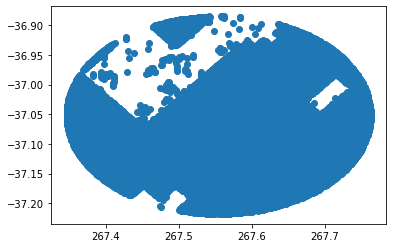

In [135]:
x = df3['RA']
y = df3['DEC']
plt.scatter(x,y)
plt.show()

# To calculate distance modulus.

In [136]:
p = df3['Plx'].mean()
p

0.18331771977999162

In [137]:
# Range of Parallax 
r1 = p+0.01
r2 = p-0.01

r1, r2

(0.19331771977999163, 0.1733177197799916)

In [138]:
d1 = np.round(1/(r1/200)*10,0)
d2 = np.round(1/(r2/200)*10,0)

d1, d2

(10346.0, 11540.0)

In [139]:
dm1 = (5*log(d1,10))-5
dm2 = (5*log(d2,10))-5

dm1, dm2

(15.073862370365315, 15.31102904409856)

In [140]:
df3.head

<bound method NDFrame.head of        index_column            source_id          RA        DEC       Plx  \
0                 0  4039960622254335232  267.476148 -37.165792  0.811679   
1                 1  4039960622254336128  267.476641 -37.169361       NaN   
2                 2  4039960622254338432  267.477779 -37.166044       NaN   
3                 3  4039960622254338688  267.477901 -37.169020 -1.131819   
4                 4  4040159874352804096  267.370685 -36.973499  4.603730   
...             ...                  ...         ...        ...       ...   
79995         79995  4039957259260925056  267.744440 -37.016189       NaN   
79996         79996  4039957259260925184  267.744536 -37.016415  1.601428   
79997         79997  4039957259260930944  267.743807 -37.016076 -6.513704   
79998         79998  4039957259260935168  267.740418 -37.017738       NaN   
79999         79999  4039957259260935296  267.740472 -37.018155  0.777333   

          e_Plx      pmRA    e_pmRA     pmDEC

In [141]:
df3 = df3.drop(df3.columns[[0]], axis = 1)
df3.index.name = 'EDR3Name'

In [142]:
df3 = df3.dropna()
df3
df3['e_Gmag'] = 1/df3['e_Gmag_flux']
df3['1/rp'] = (1/df3['G_RPmag'])**2
df3['1/bp'] = (1/df3['G_BPmag'])**2
df3['e_BP-RP'] = sqrt (df3['1/rp'] + df3['1/bp'])

In [143]:
df3 = df3[['RA','DEC','Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'Gmag', 'e_Gmag', 'BP-RP', 'e_BP-RP']]

In [144]:
df3.head(10)

,RA,DEC,Plx,e_Plx,pmRA,e_pmRA,pmDEC,e_pmDEC,Gmag,e_Gmag,BP-RP,e_BP-RP
EDR3Name,,,,,,,,,,,,
11,267.371078,-36.972411,-0.005137,0.047111,-4.207217,0.051708,-5.789679,0.033862,15.617396,0.001512,2.445526,0.005387
18,267.372268,-36.971974,0.747164,0.025040,0.882269,0.027889,-2.141258,0.017952,14.619415,0.000557,1.174120,0.003546
947,267.511312,-37.185176,0.545255,0.029495,0.305885,0.031614,0.163404,0.020110,14.605694,0.000356,0.934910,0.005415
957,267.517042,-37.172642,1.069007,0.026658,3.717929,0.028506,-2.809378,0.017820,14.092704,0.000262,0.992594,0.001286
1155,267.537411,-37.168151,0.162997,0.032946,-1.947109,0.036360,-3.006177,0.022577,15.144648,0.000326,1.940426,0.003542
1167,267.527017,-37.169300,0.067040,0.029268,-2.489637,0.034036,-5.459201,0.020774,14.831858,0.000411,2.204054,0.004003
1178,267.529257,-37.163122,0.128844,0.045554,-2.321694,0.050185,-5.320677,0.032203,15.394718,0.000658,2.307140,0.007906
1200,267.497842,-37.167384,0.431284,0.033667,-1.873134,0.037411,-4.984131,0.023109,15.165936,0.000303,1.711429,0.003642
1252,267.507966,-37.168730,0.075055,0.026367,-1.808427,0.027885,-3.198236,0.017227,14.280082,0.000719,2.460752,0.004398


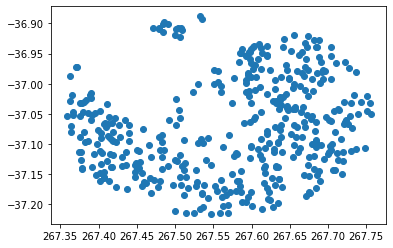

In [145]:
x = df3['RA']
y = df3['DEC']
plt.scatter(x,y)
plt.show()